# Crear conjunto de datos de comisiones legislativas
## ¿Qué son las Comisiones legislativas? 


Las comisiones legislativas son órganos de asesoramiento existentes en ambas Cámaras del Congreso de la Nación. Estan integradas por legísladores, asesores y personal de planta. Su función es estudiar los proyectos de ley y producir dictámenes sobre los mísmos. Pueden ser permanentes o especiales.

Las comisiones de asesoramiento permanente se dedican a estudiar todos los proyectos de ley ingresados a través de la Cámara de Diputados o del Senado de la Nación. Cada comisión es especialista en un tema específico como salud, educación, economía y trabajo. Por lo general, todos los proyectos de ley presentados son derivados a una o varias comisiones para que los especialistas puedan analizarlos y elaborar un dictamen. En la Cámara de Diputados hay cuarenta y cinco comisiones permanentes de asesoramiento (45).

Órgano de asesoramiento no permanentes creadas para el estudio de un asunto determinado o en los casos que la Cámara estime conveniente o en aquellos que no estén previstos en el reglamento. Se forman de manera extraordinaria para atender asuntos que exceden por su tópico o tratamiento a las permanentes, pudiendo ser unicamerales (integradas solo por Diputados) o bicamerales (integradas por diputados y senadores).

Las Comisiones especiales son creadas por Ley o por Resolución, con un motivo determinado y pueden tener un plazo prorrogable o no. Pueden ser unicamerales o bicamerales.

**Referencia**
* Comisiones: https://www.hcdn.gob.ar/comisiones/index.html
* https://datos.hcdn.gob.ar/dataset/comisiones


**Papers sobre comisiones legislativas**

* PÁG 246 de https://revista.saap.org.ar/contenido/revista-v17-n2/rsaap.17.2.a2.pdf: La Cámara de Diputados cuenta actualmente con 46 comisiones permanentes, mostrando un marcado crecimiento desde 1983, cuando contaba con sólo 26 comisiones. En promedio los legisladores participan en cinco comisiones, si bien algunos llegan a hacerlo en 10 comisiones (Tchintian, Abdala y Bertazzo, 2021: 8).
* 2023 - Actividad legislativa y territorio en Argentina: la presentación de proyectos en la Cámara de Diputados (2020-2021). VICTORIA ORTIZ DE ROZAS. https://revista.saap.org.ar/contenido/revista-v17-n2/rsaap.17.2.a2.pdf . https://www.estudiossocialesdelestado.org/index.php/ese/article/view/266
    * Para ello, seguimos una clasificación —de carácter teórico y apriorístico— de comisiones más o menos “nacionales” o más o menos “territoriales”: comisiones que pueden ser consideradas más nacionales por su temática y el tipo de bienes involucrados —públicos “puros” —; aquellas de carácter sectorial —corporativas y relativas a sectores de la economía— donde cabe esperar un peso menor de proyectos territoriales; y por último comisiones que abarcan cuestiones distributivas y bienes divisibles, donde el peso de los proyectos territoriales se espera sea mayor(Ortiz de Rozas, 2023).
    * La clasificación propuesta se diferencia en parte con la propuesta por Shugart et al(2021), la cual diferencia a las comisiones en tres tipos: de alta política —economía, política exterior, defensa, sistema legal, temas constitucionales—; las que involucran bienes públicos —educación, salud, ambiente, telecomunicaciones y similares— y las de carácter distributivo, donde se tratan temáticas sectoriales relevantes para ciertos distritos. En Ortiz de Rozas (2023) agrupamos los dos primeros tipos en “comisiones nacionales”, ya que ambas abarcan bienes públicos; al tiempo que establecemos diferencias al interior de las comisiones distributivas, diferenciando las de carácter sectorial como un tipo especial dentro de las mismas, en tanto es posible identificar problemáticas sectoriales y corporativas no subsumibles a dimensiones territoriales.




## 1.1.1 Recolección de datos 

### Datos abiertos de diputados: comisiones
* link: https://datos.hcdn.gob.ar/dataset/comisiones
* doc: https://www4.hcdn.gob.ar/Datos_doc/DOCUMENTACION%20%E2%80%93%20COMISIONES.pdf
* Responsable 	Dirección de Información Parlamentaria
* Versión 	1.0
* Última actualización 	2 de enero de 2025, 10:57 (UTC-03:00)
* Creado 	5 de junio de 2018, 11:03 (UTC-03:00)
  
Comisiones parlamentarias permanentes, especiales y bicamerales en las que interviene la Cámara de Diputados. Las presentes son replicas en formatos abiertos de la información publicada en la pagina oficial de la HCDN (http://hcdn.gob.ar/comisiones/index.html) Cualquier error o diferencia se tomara como valida la información publicada en la pagina oficial.


In [1]:
# Importar librerias
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import pickle
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

# https://pypi.org/project/textacy/
import textacy
import textacy.preprocessing as tprep


load_dotenv() 
BASE_DIR =  os.getenv("DIR_BASE")
sys.path.append(BASE_DIR)
pd.set_option('display.max_colwidth', None)

from src.nlp.limpiar_texto_legislativo import limpiar_texto_basico

In [2]:
### CONFIGURACION DATOS
FUENTE_DIR = os.getenv("DIR_FUENTE_DATOS") # Acceder a las variables de entorno
RESULTADOS_DIR = os.getenv("DIR_DATOS_PROCESADOS") # Acceder a las variables de entorno
sys.path.append(FUENTE_DIR)
sys.path.append(RESULTADOS_DIR)

In [3]:
comisiones_df = pd.read_csv(FUENTE_DIR+'diputados/comisiones1.9.csv',encoding='latin-1') #  'utf-8' codec can't decode byte 0xd1 in position 1619: invalid continuation byte
display(comisiones_df.head())
display(comisiones_df.describe(include='all'))

,id,comision_nombre,comision_grupo,periodo_inicio,periodo_finaliacion,fecha_inicio,fecha_finalizacion,Tipo de ComisiÃ³n
0,HCDN00014,ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINANC. DE OBRAS VIALES,CD,116,999,01/03/1998,0,E
1,HCDN00015,ESPECIAL INVESTIGADORA DE HECHOS ILICITOS Y CORRUPCION CONTRA EL ESTADO,CD,116,999,01/03/1998,0,E
2,HCDN00016,ESPECIAL INVESTIGADORA CONTRATACIONES ESTADO ARGENTINO - IBM,CD,116,999,01/03/1998,0,E
3,HCDN00020,ESPECIAL INVESTIGADORA ADMINISTRACION NACIONAL DE ADUANAS,CD,116,999,01/03/1998,0,E
4,HCDN00022,ASUNTOS MUNICIPALES,CD,116,999,01/03/1998,0,P


,id,comision_nombre,comision_grupo,periodo_inicio,periodo_finaliacion,fecha_inicio,fecha_finalizacion,Tipo de ComisiÃ³n
count,55,55,55,55.000000,55.000000,55,55,55
unique,55,55,1,NaN,NaN,11,2,2
top,HCDN00014,ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINANC. DE OBRAS VIALES,CD,NaN,NaN,01/03/1998,0,P
freq,1,1,55,NaN,NaN,43,54,46
mean,NaN,NaN,NaN,118.218182,983.327273,NaN,NaN,NaN
std,NaN,NaN,NaN,5.279909,116.232056,NaN,NaN,NaN
min,NaN,NaN,NaN,116.000000,137.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,116.000000,999.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,116.000000,999.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,116.000000,999.000000,NaN,NaN,NaN


### Datos abiertos de diputados: giro_comisiones
* link: https://datos.hcdn.gob.ar/dataset/giro-a-comisiones
* Documentación 	http://www4.hcdn.gob.ar/Datos_doc/Documentacion-giro comisiones.pdf
* Responsable 	Secretaría Parlamentaria
* Versión 	1.0
* Última actualización 	2 de enero de 2025, 10:48 (UTC-03:00)
* Creado 	8 de agosto de 2019, 11:45 (UTC-03:00)
* Frecuencia de actualización 	eventual
  
Remisión de expedientes a las comisiones parlamentarias para su dictamen.


In [4]:
# 1.9: Tamaño de dataset de Giro a comisiones: (392092, 3)
girocom_df = pd.read_csv(FUENTE_DIR+'diputados/giroacomisiones2.0.csv')
print('Tamaño de dataset de Giro a comisiones:',girocom_df.shape)
display(girocom_df.head(2))
display(girocom_df.describe(include='all').T)

Tamaño de dataset de Giro a comisiones: (404653, 3)


,Proyecto.ID,Comisión,Orden
0,HCDN000000,SOBRE TABLAS,1
1,HCDN001090,OBRAS PUBLICAS,1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Proyecto.ID,404653,267339,HCDN061700,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comisión,404653,196,PRESUPUESTO Y HACIENDA,47738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orden,404653.0,NaN,NaN,NaN,1.481912,0.802812,1.0,1.0,1.0,2.0,13.0


### Datos abiertos de diputados: dictamenes
* link: https://datos.hcdn.gob.ar/dataset/dictamenes
* Documentación 	http://www4.hcdn.gob.ar/Datos_doc/Documentacion-dictamenes.pdf
* Responsable 	Secretaría Parlamentaria
* Versión 	1.0
* Última actualización 	2 de enero de 2025, 11:03 (UTC-03:00)
* Creado 	8 de agosto de 2019, 11:39 (UTC-03:00)
* Frecuencia de actualización 	eventual

Resoluciones fundadas de las comisiones sobre los expedientes parlamentarios.
Las comisiones expiden la voluntad del legislador en un documento llamado dictamen, este documento es el que publicado como Orden del Día llegará al pleno del cuerpo en Sesión para ser aprobado (proyecto de declaración o resolución) o sancionado (proyecto de ley) según corresponda.

In [5]:
dictamen_df = pd.read_csv(FUENTE_DIR+'diputados/dictamenes2.5.csv')
print('Tamaño de dataset de dictamen_df:',dictamen_df.shape)
display(dictamen_df.head(2))
display(dictamen_df.describe(include='all').T)

Tamaño de dataset de dictamen_df: (23009, 8)


,Expediente,Giro,Orden,Tipo,Observaciones,Número,Fecha,Expedientes
0,HCDN103602,ACCION SOCIAL Y SALUD PUBLICA,1,ARTICULO 114,"ARTICULO 114 DEL REGLAMENTO DE LA H. CAMARA DE DIPUTADOS DE LA NACION, BAE 12/2009",NaN,NaN,1
1,HCDN103606,ACCION SOCIAL Y SALUD PUBLICA,1,ARTICULO 114,"ARTICULO 114 DEL REGLAMENTO DE LA H. CAMARA DE DIPUTADOS DE LA NACION, BAE 12/2009",NaN,NaN,1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Expediente,23009,18967,HCDN128142,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Giro,22683,58,CULTURA,3437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orden,23009.0,NaN,NaN,NaN,1.30814,0.741646,0.0,1.0,1.0,1.0,8.0
Tipo,23008,6,Orden del Día,21943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Observaciones,19266,2507,CON MODIFICACIONES,3431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Número,21940.0,NaN,NaN,NaN,1187.382498,806.394452,1.0,496.0,1064.0,1811.0,3044.0
Fecha,22082,1297,2012-11-30T00:00:00,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Expedientes,23009.0,NaN,NaN,NaN,1.246773,1.472199,1.0,1.0,1.0,1.0,42.0


## 1.1.2 Preprocesamiento de los datos 
### Limpieza de caracteres especiales

In [ ]:
"""
Para probar
print(tprep.normalize.quotation_marks('hola como "va2"'))
print(tprep.normalize.whitespace(' hola  casa    vale ') )
print(len(tprep.normalize.whitespace(' hola  casa    vale ')), len(' hola  casa    vale ') )
print(tprep.normalize.unicode('cumpleaño cómo qué'))
tprep.remove.accents('cumpleaño cómo qué')

print(tprep.remove.punctuation('cas ley 34.89') )
t = 'BICAMERAL ESPECIAL INVESTIGADORA SUBMARINO ARA SAN JUAN LEY 27 433'
print(tprep.normalize.whitespace(t))
print('LEY 27.433'.replace('.',''))
"""

In [7]:
def get_mapeo_norm_df(lista, archivo_fuente='comision'):
    BD_df = []
    if (len(lista)>0):
        BD_df = pd.DataFrame({'comision_nombre':lista, 'archivo_fuente':archivo_fuente})
        BD_df['comision_nombre_normalizada'] = BD_df['comision_nombre']
        BD_df['comision_nombre_normalizada'] = BD_df['comision_nombre_normalizada'].apply(limpiar_texto_basico)
    
    return BD_df   

##### comisiones

In [8]:
# Creamos BD de mapeo de fuentes 
# Tomamos los registros con nombre de comision
comision_list = comisiones_df[~(comisiones_df['comision_nombre'].isna())]['comision_nombre'].unique()
BD_comision_df = get_mapeo_norm_df(comision_list, 'comision')
BD_comision_df.describe()

,comision_nombre,archivo_fuente,comision_nombre_normalizada
count,55,55,55
unique,55,1,55
top,ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINANC. DE OBRAS VIALES,comision,especial analisis del sistema por peaje y financ de obras viales
freq,1,55,1


In [10]:
# Guardamos el archivo binario comisiones 
with open(RESULTADOS_DIR+'BD_comision_df_20250118.pkl', 'wb') as file:
    pickle.dump(BD_comision_df,file)

giro de comisiones

In [11]:
# Primera limpieza
# Ojo cuando se automatice cambiaron el nombre de atributo comision por Comisión
# Sin limpieza Comisión : 196 nombres únicos
comision_list = girocom_df[~(girocom_df['Comisión'].isna())]['Comisión'].unique()
BD_girocom_df = get_mapeo_norm_df(comision_list, 'giro comision')
BD_girocom_df.describe()


,comision_nombre,archivo_fuente,comision_nombre_normalizada
count,196,196,196
unique,196,1,148
top,SOBRE TABLAS,giro comision,bicameral permanente de seguimiento y control deuda exterior de la nacion ley numero
freq,1,196,3


In [12]:
# Guardamos el archivo binario comisiones giro de comisiones
with open(RESULTADOS_DIR+'BD_girocom_df_20250118.pkl', 'wb') as file:
    pickle.dump(BD_girocom_df,file)

In [13]:
# Primera limpieza
# Sin limpieza Comisión : 196 nombres únicos
comision_list = dictamen_df[~(dictamen_df['Giro'].isna())]['Giro'].unique()
BD_dictamen_df = get_mapeo_norm_df(comision_list, 'dictamen')
BD_dictamen_df.describe()

,comision_nombre,archivo_fuente,comision_nombre_normalizada
count,58,58,58
unique,58,1,58
top,ACCION SOCIAL Y SALUD PUBLICA,dictamen,accion social y salud publica
freq,1,58,1


In [14]:
# Guardamos el archivo binario dictamenes
with open(RESULTADOS_DIR+'BD_dictamen_df_20250118.pkl', 'wb') as file:
    pickle.dump(BD_dictamen_df,file)

#### Integramos bases

In [15]:
# Integramos base
# Giro comision y dictamen
#BD_girocom_df[['comision_nombre_norm','archivo_fuente']].drop_duplicates().shape - (149, 2)
mapeo_fuente = {'both':'giro comision, dictamen', 'left_only':'giro comision', 'right_only':'dictamen'}
BD_normalizada_df =  BD_girocom_df[['comision_nombre_normalizada','archivo_fuente']].drop_duplicates().merge(BD_dictamen_df[['comision_nombre_normalizada','archivo_fuente']].drop_duplicates(), how='outer',  left_on='comision_nombre_normalizada', right_on='comision_nombre_normalizada', indicator=True)
BD_normalizada_df['_merge'] = BD_normalizada_df['_merge'].map(mapeo_fuente)
BD_normalizada_df = BD_normalizada_df[['comision_nombre_normalizada','_merge']]
BD_normalizada_df.columns = ['comision_nombre_normalizada', 'archivo_fuente']
display(BD_normalizada_df.describe())
display(BD_normalizada_df['archivo_fuente'].value_counts())



,comision_nombre_normalizada,archivo_fuente
count,148,148
unique,148,2
top,a la presidencia,giro comision
freq,1,90


archivo_fuente
giro comision              90
giro comision, dictamen    58
dictamen                    0
Name: count, dtype: int64

In [16]:
# MergeamoS con comision
BD_normalizada_df = BD_normalizada_df.merge(BD_comision_df[['comision_nombre_normalizada','archivo_fuente']].drop_duplicates(), how='outer',  left_on='comision_nombre_normalizada', right_on='comision_nombre_normalizada', indicator=True)
BD_normalizada_df['_merge'] = np.where(BD_normalizada_df._merge == 'left_only', BD_normalizada_df.archivo_fuente_x, np.where(BD_normalizada_df._merge == 'right_only',BD_normalizada_df.archivo_fuente_y, 'giro comision, dictamen, comision'))
BD_normalizada_df = BD_normalizada_df[['comision_nombre_normalizada','_merge']]
BD_normalizada_df.columns = ['comision_nombre_normalizada', 'archivo_fuente']
display(BD_normalizada_df.describe())
display(BD_normalizada_df['archivo_fuente'].value_counts())


,comision_nombre_normalizada,archivo_fuente
count,155,155
unique,155,4
top,a la presidencia,giro comision
freq,1,87


archivo_fuente
giro comision                        87
giro comision, dictamen, comision    48
giro comision, dictamen              13
comision                              7
Name: count, dtype: int64

In [17]:
BD_normalizada_df.head(4)

,comision_nombre_normalizada,archivo_fuente
0,a la presidencia,giro comision
1,a sus antecedentes,giro comision
2,accion social y salud publica,"giro comision, dictamen, comision"
3,acuerdos,giro comision


### Normalización: Similitud de nombre por distancia de Levenshtein 

Utiliza la distancia de Levenshtein para calcular las diferencias entre secuencias o string

In [18]:
# libreria
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

C:\Users\Usuario\iamas_iniciativasleg_salud\myenv_IL\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [19]:
# https://pypi.org/project/fuzzywuzzy/
# https://www.geeksforgeeks.org/how-to-do-fuzzy-matching-on-pandas-dataframe-column-using-python/

# Brindar un dataframe con los calculos de similitud de palabras por la distancia de Levenshtein 
def fuzzy_get(list1,list2, name = 'comision_nombre_normalizada', extractOne = True):
    
    mat = [] 

    try:
        dframe = pd.DataFrame(list1)
        # Iterando la lista1
        for i in list1: 
            # genero la lista de palabras a comparar
            list3 = [ x  for x in list2 if x!= i] 
            # Busco la primera palabra más alta mediante el calculo de scorer token_sort_ratio
            if (extractOne):
                fuzz_get = process.extractOne(i, list3, scorer=fuzz.token_sort_ratio)
            else:
                fuzz_get = process.extract(i, list3, scorer=fuzz.token_sort_ratio, limit = 10)
                
            # Agrego tupla a lista
            mat.append(fuzz_get) 
        if (extractOne):
            dframe[['matches','score']] = mat
            dframe.columns = [name, 'comision_nombre_macheo', 'puntaje_Levenshtein']
        else: 
            dframe['matches'] = mat
            dframe.columns = [name, 'comision_nombre_macheo']
            

    except  Exception  as e:
       
        print("Hay error: Controlar los argumentos considerados como lista de palabras de string, nombre, score")
        print(e)
    else:
        print(f"Se logro encontrar similitudes {dframe.info()}")
    finally:
        print("** Proceso finalizado **")
    return dframe

In [20]:
BD_normalizada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   comision_nombre_normalizada  155 non-null    object
 1   archivo_fuente               155 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [21]:
# Primera busqueda de similitud de nombres de comisiones
listx = list(BD_normalizada_df['comision_nombre_normalizada'].values)
fuzzy_df = fuzzy_get(listx, listx.copy(),'comision_nombre_normalizada', True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   comision_nombre_normalizada  155 non-null    object
 1   comision_nombre_macheo       155 non-null    object
 2   puntaje_Levenshtein          155 non-null    object
dtypes: object(3)
memory usage: 3.8+ KB
Se logro encontrar similitudes None
** Proceso finalizado **


In [22]:
fuzzy_df.head(2)

,comision_nombre_normalizada,comision_nombre_macheo,puntaje_Levenshtein
0,a la presidencia,de las personas mayores,51
1,a sus antecedentes,a la presidencia,41


In [23]:
# Estadísticas de fuzz_score
fuzzy_df.puntaje_Levenshtein = fuzzy_df['puntaje_Levenshtein'].astype('int')
fuzzy_df.puntaje_Levenshtein.describe()

count    155.000000
mean      65.200000
std       12.606121
min       41.000000
25%       55.500000
50%       64.000000
75%       71.500000
max       97.000000
Name: puntaje_Levenshtein, dtype: float64

<Axes: >

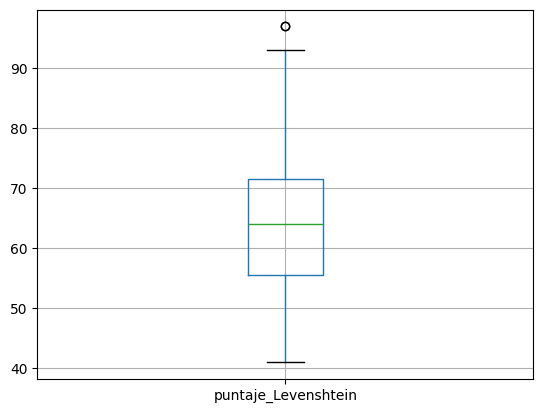

In [24]:
# Como se distribuye el puntaje de similitud
fuzzy_df.boxplot(column=['puntaje_Levenshtein'])  

#### Comisiones relacionadas por similitud de nombre, > 72 (cálculo de distancia Levenshtein y selección 1 a 1 por máx. similitud) 

In [25]:
# fuzzy_df.fuzz_score.describe()['75%'] = 72
fuzzy_df[fuzzy_df.puntaje_Levenshtein>fuzzy_df.puntaje_Levenshtein.describe()['75%']].sort_values(by = 'puntaje_Levenshtein', ascending = False)

,comision_nombre_normalizada,comision_nombre_macheo,puntaje_Levenshtein
26,bicameral de los derechos de las ninas ninos y adolescentes ley numero,bicameral de los derechos de ninas ninos y adolescentes ley numero,97
27,bicameral de los derechos de ninas ninos y adolescentes ley numero,bicameral de los derechos de las ninas ninos y adolescentes ley numero,97
62,deporte,deportes,93
63,deportes,deporte,93
6,agricultura ganaderia y pesca,agricultura y ganaderia,88
7,agricultura y ganaderia,agricultura ganaderia y pesca,88
74,economias regionales micro pequena y mediana empresa,economias regionales economia social micro pequena y mediana empresa,87
73,economias regionales economia social micro pequena y mediana empresa,economias regionales micro pequena y mediana empresa,87
129,poblacion y desarrollo humano,poblacion y desarrollo,86
128,poblacion y desarrollo,poblacion y desarrollo humano,86


In [26]:
# Cantidad de registros
fuzzy_df[fuzzy_df.puntaje_Levenshtein>fuzzy_df.puntaje_Levenshtein.describe()['75%']].shape

(39, 3)

In [27]:
# Para buscar patrones - expresiones regulares
#fuzzy_df[fuzzy_df.puntaje_Levenshtein>fuzzy_df.puntaje_Levenshtein.describe()['75%']][['comision_nombre_normalizada']].to_csv('patron.csv',index=False)

In [28]:
# Diccionario de limpieza
ids = {'Id':['BICAMERAL DE LOS DERECHOS DE NINAS NINOS Y ADOLESCENTES LEY 26061','DEPORTES'],
      'puntaje_Levenshtein':['BICAMERAL DE LOS DERECHOS DE LAS NINAS NINOS Y ADOLESCENTES LEY 26061','DEPORTE']}

ids = dict(zip(ids['Id'], ids['puntaje_Levenshtein']))
print (ids)

{'BICAMERAL DE LOS DERECHOS DE NINAS NINOS Y ADOLESCENTES LEY 26061': 'BICAMERAL DE LOS DERECHOS DE LAS NINAS NINOS Y ADOLESCENTES LEY 26061', 'DEPORTES': 'DEPORTE'}


In [29]:
# Reemplazamos en base a fuzzy
BD_normalizada_df['comision_nombre_normalizada_Levenshtein'] = BD_normalizada_df['comision_nombre_normalizada'].copy()
BD_normalizada_df['comision_nombre_normalizada_Levenshtein'] = BD_normalizada_df['comision_nombre_normalizada_Levenshtein'].replace(ids, regex=True)
print('test 1:',BD_normalizada_df[BD_normalizada_df['comision_nombre_normalizada_Levenshtein'].str.contains('BICAMERAL DE LOS DERECHOS DE NINAS NINOS')])
print('test 2:',BD_normalizada_df[BD_normalizada_df['comision_nombre_normalizada_Levenshtein'].str.contains('DEPORTES')])

test 1: Empty DataFrame
Columns: [comision_nombre_normalizada, archivo_fuente, comision_nombre_normalizada_Levenshtein]
Index: []
test 2: Empty DataFrame
Columns: [comision_nombre_normalizada, archivo_fuente, comision_nombre_normalizada_Levenshtein]
Index: []


### Expresiones regulares para asociar nombres teniendo en cuenta similitud

En base a los nombres de comisones, se pueden identificar ciertos patrones comunes, expresiones regulares para diferentes categorías. Aquí hay algunas observaciones iniciales:

* Frases completas con temas específicos: Ejemplo: "ACCION SOCIAL Y SALUD PUBLICA", "AGRICULTURA Y GANADERIA".

Estos valores suelen ser palabras en mayúsculas separadas por espacios.
* Referencias a artículos de leyes: Ejemplo: "AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 109 DEL REGLAMENTO H SENADO".

Contienen una referencia a un número de artículo.

* Comisiones bicamerales: Ejemplo: "BICAMERAL DE LOS DERECHOS DE LAS NINAS NINOS Y ADOLESCENTES LEY 26061".
Incluyen "BICAMERAL" y a menudo una referencia a una ley.

Una comisión bicameral es un grupo de trabajo que está formado por legisladores de ambas cámaras del Congreso. Su objetivo es atender asuntos de interés común. Las comisiones bicamerales pueden ser permanentes o especiales. En la mayoría de los casos, están establecidas por ley. 


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Obtener valores únicos de la columna y una muestra para inspección tal que representen el 75%
df = BD_normalizada_df[['comision_nombre_normalizada_Levenshtein']]
valores_unicos = df['comision_nombre_normalizada_Levenshtein'].unique()



In [31]:
# Contabilizamos las palabras mas repetidas
vec = TfidfVectorizer()
vec.fit(valores_unicos) ##fit con documentos

TfidfVectorizer()

In [32]:
frec_df = pd.DataFrame.from_dict(vec.vocabulary_,orient='index').reset_index() 
frec_df.columns = ['palabra','frecuencia']

In [33]:
# Top 20 palabras
frec_df.sort_values('frecuencia', ascending = False).head(20)

,palabra,frecuencia
118,zonas,308
223,yacyreta,307
238,vivienda,306
189,violencia,305
215,vinculados,304
187,viales,303
200,valle,302
157,usuarios,301
160,usuario,300
308,urbano,299


In [34]:

# Definir expresiones regulares para las categorías identificadas
regex_patterns = {
    "comisiones_generales": r"^[A-Z\s]+$",  # Solo palabras en mayúsculas y espacios
    "articulos_leyes": r"ARTICULO \d+",      # Referencias a artículos (e.g., ARTICULO 109)
    "referencias_leyes": r"LEY \d+",         # Referencias a leyes (e.g., LEY 26061)
    "bicamerales": r"\bBICAMERAL\b",         # Comisiones bicamerales (palabra clave "BICAMERAL")
}

# Probar las expresiones regulares en la muestra de datos
matches = {key: [value for value in valores_unicos if re.search(pattern, value)]
           for key, pattern in regex_patterns.items()}

matches

{'comisiones_generales': [],
 'articulos_leyes': [],
 'referencias_leyes': [],
 'bicamerales': []}

In [35]:
# Guardamos el archivo binario comisiones relacionadas por similitud de nombre
with open(RESULTADOS_DIR+'comision_fuzz_20250118.pkl', 'wb') as file:
    pickle.dump(fuzzy_df,file)

In [36]:
# # Guardamos el archivo binario
with open(RESULTADOS_DIR+'BD_normalizada_df_20250118.pkl', 'wb') as file:
    pickle.dump(BD_normalizada_df,file)

### Comisiones de salud

In [41]:
# Palabra clave
palabra = 'salud'

In [42]:
# Nombre de comisión permanente 'P'
BD_normalizada_df[BD_normalizada_df['comision_nombre_normalizada_Levenshtein'].str.contains(palabra)]

,comision_nombre_normalizada,archivo_fuente,comision_nombre_normalizada_Levenshtein
2,accion social y salud publica,"giro comision, dictamen, comision",accion social y salud publica
13,asistencia social y salud publica,giro comision,asistencia social y salud publica
140,salud,giro comision,salud
141,salud y deporte,giro comision,salud y deporte


La comisión permanente 'ACCION SOCIAL Y SALUD PUBLICA' presenta datos asociados a datos básicos de comisiones, giros y dictamenes.

### Guardamos base de datos formateada

In [39]:
BD_normalizada_df.columns

Index(['comision_nombre_normalizada', 'archivo_fuente',
       'comision_nombre_normalizada_Levenshtein'],
      dtype='object')

In [43]:
BD_normalizada_df.head()

,comision_nombre_normalizada,archivo_fuente,comision_nombre_normalizada_Levenshtein
0,a la presidencia,giro comision,a la presidencia
1,a sus antecedentes,giro comision,a sus antecedentes
2,accion social y salud publica,"giro comision, dictamen, comision",accion social y salud publica
3,acuerdos,giro comision,acuerdos
4,administradora de la biblioteca del congreso,giro comision,administradora de la biblioteca del congreso
